In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
#Shape of dataframe
print(" Shape of dataframe: ", df.shape)

 Shape of dataframe:  (18207, 89)


In [4]:
# Drop duplicates
df.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", df.shape)

 Shape of dataframe after dropping duplicates:  (18207, 89)


In [5]:
#Variable inspection

print("Names of columns ", list(df.columns))

Names of columns  ['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', '

In [6]:
df= df.drop(columns= "Unnamed: 0")

In [7]:
print("Names of columns ", list(df.columns))

Names of columns  ['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause

In [49]:
sql = "ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'"
print(sql)
sql = sql.replace('\'', '')
print(sql)

ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'
ID, Name, Age, Pho

In [8]:
#Null values

null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data)


Null Values in each column:
              column name  Total missing  Percent missing
0            Loaned From          16943         0.930576
1                    LWB           2085         0.114516
2                     LM           2085         0.114516
3                     CB           2085         0.114516
4                    LCB           2085         0.114516
5                     LB           2085         0.114516
6                    RWB           2085         0.114516
7                    RDM           2085         0.114516
8                    CDM           2085         0.114516
9                    LDM           2085         0.114516
10                    RM           2085         0.114516
11                   RCM           2085         0.114516
12                    CM           2085         0.114516
13                   LCM           2085         0.114516
14                   RAM           2085         0.114516
15                    RB           2085         0.114516
16

In [9]:
df_isnull = pd.isnull(df["LB"])
df[df_isnull]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M
19,192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
22,167495,M. Neuer,32,https://cdn.sofifa.org/players/4/19/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,89,89,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,€62.7M
37,167948,H. Lloris,31,https://cdn.sofifa.org/players/4/19/167948.png,France,https://cdn.sofifa.org/flags/18.png,88,88,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,65.0,29.0,10.0,18.0,88.0,84.0,68.0,83.0,92.0,€66.6M
40,162835,S. Handanovič,33,https://cdn.sofifa.org/players/4/19/162835.png,Slovenia,https://cdn.sofifa.org/flags/44.png,88,88,Inter,https://cdn.sofifa.org/teams/2/light/44.png,...,69.0,25.0,10.0,13.0,87.0,86.0,69.0,89.0,89.0,€51M
41,1179,G. Buffon,40,https://cdn.sofifa.org/players/4/19/1179.png,Italy,https://cdn.sofifa.org/flags/27.png,88,88,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,70.0,13.0,11.0,11.0,88.0,87.0,74.0,90.0,83.0,€7.4M
46,193041,K. Navas,31,https://cdn.sofifa.org/players/4/19/193041.png,Costa Rica,https://cdn.sofifa.org/flags/72.png,87,87,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,67.0,28.0,14.0,14.0,90.0,81.0,75.0,82.0,90.0,€62.5M
57,210257,Ederson,24,https://cdn.sofifa.org/players/4/19/210257.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,70.0,28.0,15.0,8.0,85.0,80.0,91.0,82.0,87.0,€79.9M


In [10]:
#Filtering data with null values for position

df_isnull = pd.isnull(df["LB"])
pos_null= df[df_isnull]
print(pos_null.shape)
print(pos_null.isnull().sum().sort_values(ascending= False))

(2085, 88)
LWB                     2085
LM                      2085
CB                      2085
LCB                     2085
LB                      2085
RWB                     2085
RDM                     2085
CDM                     2085
LDM                     2085
RM                      2085
RCM                     2085
CM                      2085
LCM                     2085
RAM                     2085
RB                      2085
CAM                     2085
LAM                     2085
RW                      2085
RF                      2085
CF                      2085
LF                      2085
LW                      2085
RS                      2085
ST                      2085
LS                      2085
RCB                     2085
Loaned From             1996
Release Clause           185
Joined                   182
Contract Valid Until      93
                        ... 
Finishing                 48
Interceptions             48
FKAccuracy                48
Lon

In [11]:
#Filtering relevant data & checking for club null values
df_notnull = pd.notnull(df["LB"])
df= df[df_notnull]
print(df.shape)
df.head()

(16122, 88)


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M


In [12]:
df_isnull = pd.isnull(df["Club"])
pos_null= df[df_isnull]
print(pos_null.shape)
print(pos_null.isnull().sum().sort_values(ascending= False))

(196, 88)
Release Clause          196
Club                    196
Contract Valid Until    196
Joined                  196
Loaned From             196
LM                        0
LW                        0
RCM                       0
Height                    0
Weight                    0
LS                        0
ST                        0
RS                        0
LF                        0
RAM                       0
CF                        0
CM                        0
RW                        0
LCM                       0
LAM                       0
CAM                       0
RF                        0
Jersey Number             0
GKReflexes                0
Value                     0
Name                      0
Age                       0
Photo                     0
Nationality               0
Flag                      0
                       ... 
Marking                   0
StandingTackle            0
SlidingTackle             0
GKDiving                  0
GKHandling

In [13]:
df_notnull = pd.notnull(df["Club"])
df= df[df_notnull]
print(df.shape)
print(df.isnull().sum().sort_values(ascending= False))

(15926, 88)
Loaned From             14751
Release Clause           1183
Joined                   1175
CM                          0
LW                          0
RCM                         0
Contract Valid Until        0
Height                      0
Weight                      0
LS                          0
ST                          0
RS                          0
LF                          0
LCM                         0
GKReflexes                  0
RF                          0
RW                          0
LAM                         0
CAM                         0
RAM                         0
LM                          0
CF                          0
Jersey Number               0
Position                    0
Club Logo                   0
Name                        0
Age                         0
Photo                       0
Nationality                 0
Flag                        0
                        ...  
Marking                     0
StandingTackle              

In [14]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M


In [15]:
df = df.drop(columns=['Height'])
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M


In [16]:
df["Weight"]= df["Weight"].str.split("lbs", n = 1, expand = True)
df["Weight"].astype(str).astype(int)

0        159
1        183
2        150
4        154
5        163
6        146
7        190
8        181
10       176
11       168
12       172
13       148
14       159
15       165
16       196
17       161
20       168
21       170
23       154
24       187
25       161
26       157
27       185
28       172
29       130
30       174
31       168
32       150
33       176
34       203
        ... 
18171    148
18173    132
18174    161
18175    154
18176    148
18177    163
18179    163
18181    134
18182    165
18184    179
18185    159
18186    174
18187    161
18188    148
18189    165
18190    176
18191    168
18192    165
18193    146
18195    141
18196    146
18197    141
18199    150
18200    157
18201    168
18202    134
18203    170
18204    148
18205    154
18206    176
Name: Weight, Length: 15926, dtype: int64

In [17]:
df = df.drop(columns=['Release Clause'])
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0


In [18]:
df = df.drop(columns=['Value', 'Wage'])
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0


In [19]:
split= ["LS","ST","RS","LW","LF","CF","RF","RW","LAM","CAM","RAM","LM","LCM","CM","RCM","RM","LWB",
        "LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB"]
df = df.apply(lambda x : x.str.split('+').str[0].astype(str).astype(int) if x.name in ["LS","ST","RS","LW","LF","CF","RF","RW","LAM","CAM","RAM","LM","LCM","CM","RCM","RM","LWB",
        "LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB"] else x)
    
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0


In [20]:
df=df.fillna(0)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0


In [21]:
unique_position= df.Position.unique()
unique_position

array(['RF', 'ST', 'LW', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB', 'LDM',
       'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM', 'RW',
       'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [22]:
list(df.columns)

['ID',
 'Name',
 'Age',
 'Photo',
 'Nationality',
 'Flag',
 'Overall',
 'Potential',
 'Club',
 'Club Logo',
 'Special',
 'Preferred Foot',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Work Rate',
 'Body Type',
 'Real Face',
 'Position',
 'Jersey Number',
 'Joined',
 'Loaned From',
 'Contract Valid Until',
 'Weight',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositi

In [23]:
#Drop unnecessary columns

df_model= df.drop(columns=['ID', 'Name', 'Photo', 'Nationality', 
                           'Flag','Club', 'Club Logo', 
                           'Special', 'Preferred Foot','Weak Foot', 
                           'Skill Moves', 'Work Rate', 'Body Type',
                           'Real Face', 'Position', 'Jersey Number', 
                           'Joined', 'Loaned From', 'Contract Valid Until',
                           'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 
                           'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM','LM', 
                           'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 
                           'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB','Crossing', 
                           'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',  
                           'Dribbling', 'Curve', 'FKAccuracy', 'BallControl', 'Acceleration',
                           'Reactions','ShotPower', 'LongShots',  'Interceptions', 'Penalties', 
                           'Marking','StandingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 
                           'GKPositioning', 'GKReflexes'])
                           

In [24]:
df_model.head()

,Age,Overall,Potential,International Reputation,LongPassing,SprintSpeed,Agility,Balance,Jumping,Stamina,Strength,Aggression,Positioning,Vision,Composure,SlidingTackle
0,31,94,94,5.0,87.0,86.0,91.0,95.0,68.0,72.0,59.0,48.0,94.0,94.0,96.0,26.0
1,33,94,94,5.0,77.0,91.0,87.0,70.0,95.0,88.0,79.0,63.0,95.0,82.0,95.0,23.0
2,26,92,93,5.0,78.0,90.0,96.0,84.0,61.0,81.0,49.0,56.0,89.0,87.0,94.0,33.0
4,27,91,92,4.0,91.0,76.0,79.0,77.0,63.0,90.0,75.0,76.0,87.0,94.0,88.0,51.0
5,27,91,91,4.0,83.0,88.0,95.0,94.0,56.0,83.0,66.0,54.0,87.0,89.0,91.0,22.0


In [25]:
#Split Overall as a Target value
target = df_model.Overall
df_model2 = df_model.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_model2, target, test_size=0.2)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(X_train.head())
print(y_test.shape,y_train.shape)

(3186, 15) (12740, 15)
       Age  Potential  International Reputation  LongPassing  SprintSpeed  \
11250   25         65                       1.0         59.0         70.0   
17467   26         56                       1.0         49.0         45.0   
5093    27         70                       1.0         67.0         54.0   
10219   20         72                       1.0         58.0         71.0   
1748    23         79                       1.0         70.0         77.0   

       Agility  Balance  Jumping  Stamina  Strength  Aggression  Positioning  \
11250     74.0     79.0     70.0     66.0      58.0        37.0         60.0   
17467     75.0     73.0     57.0     65.0      68.0        36.0         55.0   
5093      56.0     52.0     55.0     85.0      82.0        74.0         46.0   
10219     73.0     62.0     62.0     65.0      71.0        55.0         43.0   
1748      76.0     70.0     64.0     77.0      68.0        53.0         75.0   

       Vision  Composure  Sliding

In [26]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score 

print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))
#print('Accurancy '+str(accuracy_score(y_test ,predictions)))
#print (accuracy_score (y_test ,predictions))

r2 score: 0.9022133907632878
RMSE : 2.135428165011083


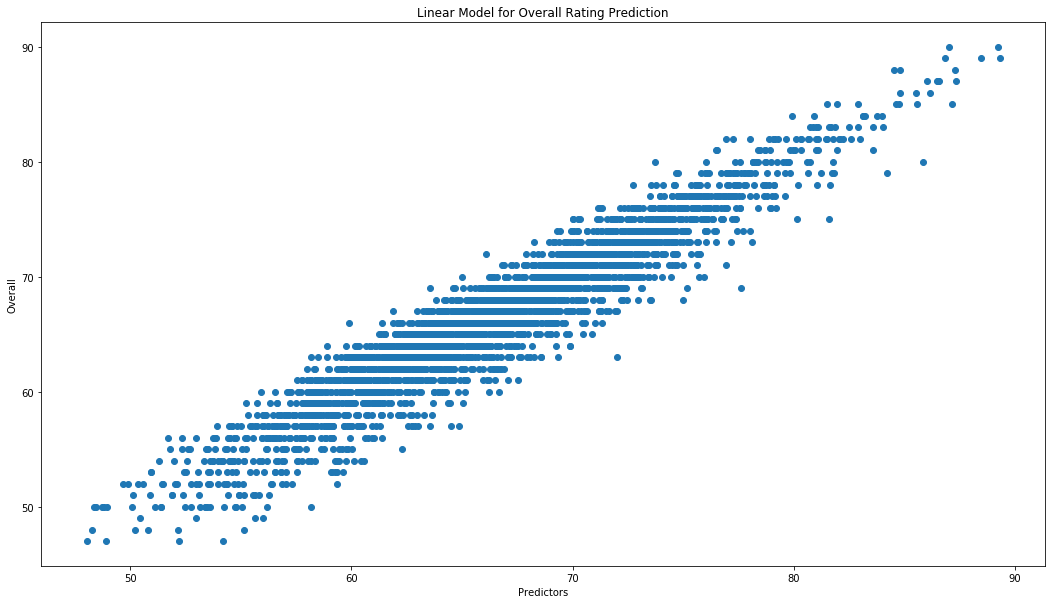

In [27]:
plt.figure(figsize=(18,10))
plt.scatter(predictions, y_test)
plt.xlabel("Predictors")
plt.ylabel('Overall')
plt.title("Linear Model for Overall Rating Prediction")
plt.show()

[ 0.69307334  0.68066055  0.48553648  0.04358595  0.05257629  0.01734469
 -0.02015889  0.00873559  0.04460358  0.04297894  0.00923768  0.02447255
 -0.01346837  0.10674437  0.00375898]


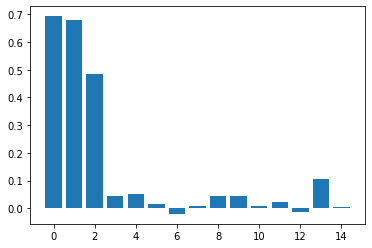

In [28]:
Y = model.coef_
X = range(len(Y))
plt.bar(X,Y)
print(Y)

In [29]:
from sklearn.neighbors import KNeighborsRegressor
K = 10
model = KNeighborsRegressor(n_neighbors=K)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [31]:
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.8755340657977543
RMSE : 2.4091870745806414


In [30]:
print('Predicted weights: %s' % predictions)
print('Actual weights: %s' % y_test)

Predicted weights: [69.75 57.25 60.75 ... 68.5  54.75 50.25]
Actual weights: 4033     71
17683    53
16419    57
2961     73
14671    60
10863    65
3997     71
3017     73
1578     75
4767     70
8000     67
11360    64
3260     72
3858     72
7882     67
15576    59
7670     67
15635    59
10133    65
16813    56
15033    60
11660    64
17264    55
10318    65
2970     73
6813     68
11588    64
4766     70
15519    59
8080     67
         ..
4022     71
9229     66
14674    60
14269    61
10951    65
5814     69
8060     67
16402    57
728      78
3795     72
1116     77
2100     74
15772    59
10500    65
6349     69
10433    65
15250    60
3356     72
4687     71
11631    64
8007     67
13203    62
2112     74
13345    62
9005     66
16365    57
2380     74
6445     69
16022    58
18007    51
Name: Overall, Length: 3186, dtype: int64


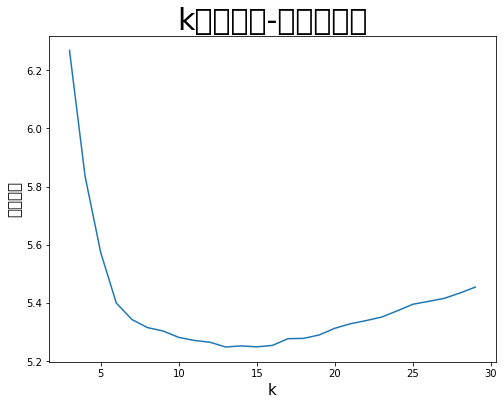

In [43]:
score_list = []
param_test = {'n_neighbors': np.arange(3, 30, 1)}
Gs = GridSearchCV(estimator=KNeighborsRegressor(weights='uniform'),
                  param_grid=param_test, scoring='neg_mean_squared_error', cv=5)  
Gs.fit(X_train, y_train)
score_list = -Gs.cv_results_['mean_test_score']  # 取反,损失是负数
plt.figure(figsize=[8, 6])
plt.plot(range(3, 30, 1), score_list)
plt.xlabel("k", fontsize=15)
plt.ylabel("MSE", fontsize=15)
plt.title("best_k", fontsize=30)
plt.show()

In [44]:
Gs.best_estimator_
Gs.best_score_
Gs.best_params_

{'n_neighbors': 13}

In [45]:
K = 13
model = KNeighborsRegressor(n_neighbors=K, weights='uniform')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.8934520533537382
RMSE : 2.2290397601188303
